In [1]:
!pip install basemap
!pip install folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.basemap import Basemap
from pyproj import Transformer
import folium


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\ParkChunSoo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [21]:
df = pd.read_csv("병원목록(2023년12월).csv", encoding='UTF-8')
df

,암호화요양기호,요양기관명,총의사수,시도코드명_x,시군구코드명_x,좌표(X),좌표(Y),진료과목코드명,종별코드명_y
0,JDQ4MTg4MSM1MSMkMSMkMCMkNzIkNDgxNzAyIzExIyQxIy...,서울닥터우치과의원,1.0,서울,중랑구,127.078386,37.605658,"구강악안면외과,치과보철과,치과교정과,소아치과,치주과,치과보존과,구강내과,영상치의학과...",치과의원
1,JDQ4MTg4MSM1MSMkMSMkMCMkNzIkNDgxNzAyIzExIyQxIy...,이가튼튼치과의원,1.0,서울,은평구,126.919112,37.599536,"구강악안면외과,치과보철과,치과교정과,소아치과,치주과,치과보존과,구강내과,영상치의학과...",치과의원
2,JDQ4MTg4MSM1MSMkMSMkMCMkNzIkNDgxNzAyIzIxIyQxIy...,에이스치과의원,1.0,서울,마포구,126.952142,37.546194,"구강악안면외과,치과보철과,치과교정과,소아치과,치주과,치과보존과,구강내과,영상치의학과...",치과의원
3,JDQ4MTg4MSM1MSMkMSMkMCMkNzIkNDgxNzAyIzMxIyQyIy...,서울더좋은치과의원,1.0,서울,영등포구,126.902372,37.533274,"구강악안면외과,치과보철과,치과교정과,소아치과,치주과,치과보존과,구강내과,영상치의학과...",치과의원
4,JDQ4MTg4MSM1MSMkMSMkMCMkNzIkNDgxNzAyIzMxIyQyIy...,연세유라인치과의원,1.0,서울,관악구,126.930118,37.484779,"치과,구강악안면외과,치과보철과,치과교정과,소아치과,치주과,치과보존과,구강내과,영상치...",치과의원
...,...,...,...,...,...,...,...,...,...
73367,JDQ4MTAxMiM1MSMkMSMkMCMkNzIkMzgxOTYxIzIxIyQyIy...,신서경치과의원,1.0,부산,부산동래구,129.075176,35.198572,치과,치과의원
73368,JDQ4MTg4MSM1MSMkMSMkMCMkNzIkMzgxNzAyIzQxIyQxIy...,이플러스치과의원,3.0,서울,종로구,126.973302,37.571840,치과,치과의원
73369,JDQ4MTAxMiM1MSMkMSMkMCMkNzIkMzgxOTYxIzUxIyQxIy...,보스턴치과의원,1.0,부산,부산해운대구,129.118886,35.198950,치과,치과의원
73370,JDU4MTI3MSM1MSMkMiMkMCMkMDAkNDgxOTYxIzUxIyQxIy...,삼성드림소아청소년과의원,1.0,경기,남양주시,127.247449,37.663582,소아청소년과,의원


# 대한민국 전체 병원 분포보기

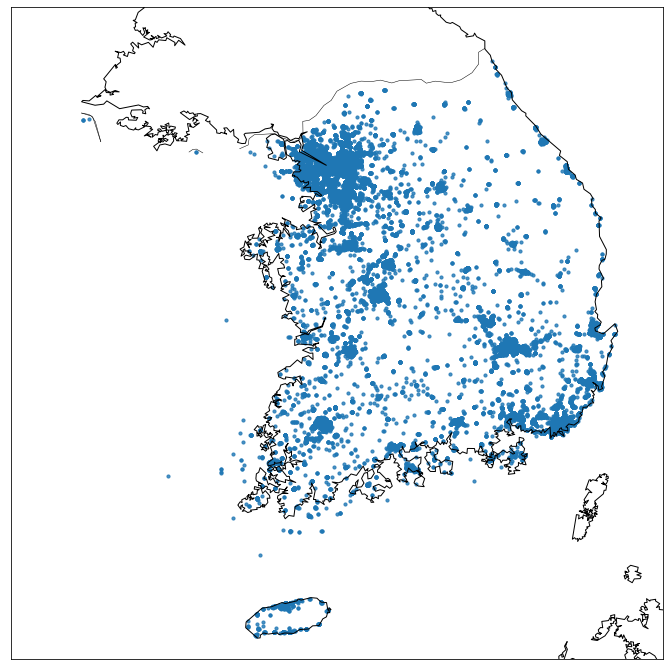

In [4]:
plt.figure(figsize=(12, 12))
m = Basemap(llcrnrlon=124, llcrnrlat=33, urcrnrlon=130, urcrnrlat=39, resolution='i')
m.drawcoastlines()
m.drawcountries()
x, y = m(df['좌표(X)'].values, df['좌표(Y)'].values)
m.scatter(x, y, s=10, alpha=0.8)
plt.show()

# 진료과별 병원 분포보기 (Basemap)

'치과', '구강악안면외과', '치과보철과', '치과교정과', '소아치과', '치주과', '치과보존과', '구강내과',
       '영상치의학과', '예방치과', '통합치의학과', '구강병리과', 내과', '정신건강의학과', '외과',
       '정형외과', '피부과', '신경과', '소아청소년과', '안과', '이비인후과', '가정의학과', '한방내과',
       '한방부인과', '한방신경정신과', '침구과', '한방재활의학과', '한방소아과', '한방안·이비인후·피부과',
       '사상체질과', '한방응급', '신경외과', '마취통증의학과', '재활의학과', '성형외과', '영상의학과',
       '병리과', '비뇨의학과', '산부인과', '방사선종양학과', '진단검사의학과', '결핵과', '핵의학과',
       '응급의학과', '직업환경의학과', '심장혈관흉부외과', '예방의학과' 중 택1

진료과를 입력하시오 : 소아과


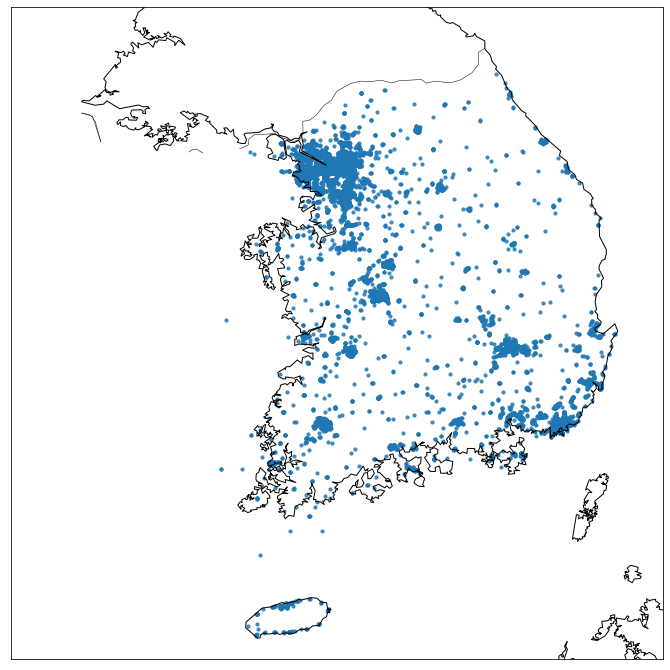

In [20]:
hosType = input("진료과를 입력하시오 : ")

plt.figure(figsize=(12, 12))
m = Basemap(llcrnrlon=124, llcrnrlat=33, urcrnrlon=130, urcrnrlat=39, resolution='i')
m.drawcoastlines()
m.drawcountries()
dfTemp = df[df['진료과목코드명'].str.contains(hosType)]
x, y = m(dfTemp['좌표(X)'].values, dfTemp['좌표(Y)'].values)
m.scatter(x, y, s=10, alpha=0.8)
plt.show()

# 진료과별 병원 분포보기 (Folium)

'치과', '구강악안면외과', '치과보철과', '치과교정과', '소아치과', '치주과', '치과보존과', '구강내과',
       '영상치의학과', '예방치과', '통합치의학과', '구강병리과', 내과', '정신건강의학과', '외과',
       '정형외과', '피부과', '신경과', '소아청소년과', '안과', '이비인후과', '가정의학과', '한방내과',
       '한방부인과', '한방신경정신과', '침구과', '한방재활의학과', '한방소아과', '한방안·이비인후·피부과',
       '사상체질과', '한방응급', '신경외과', '마취통증의학과', '재활의학과', '성형외과', '영상의학과',
       '병리과', '비뇨의학과', '산부인과', '방사선종양학과', '진단검사의학과', '결핵과', '핵의학과',
       '응급의학과', '직업환경의학과', '심장혈관흉부외과', '예방의학과' 중 택1

In [ ]:
hosType = input("진료과를 입력하시오 : ")

m = folium.Map(location=[36.5, 127.5], zoom_start=7)
dfTemp = df[df['진료과목코드명'].str.contains(hosType)]
for idx, row in dfTemp.iterrows():
    folium.Marker([row['좌표(Y)'], row['좌표(X)']], popup=row['종별코드명_y']).add_to(m)
m

# 병원 종류별 병원 분포보기 (Basemap)

'치과의원', '의원', '한방병원', '한의원', '요양병원', '병원', '치과병원', '정신병원', '종합병원',
       '보건지소', '상급종합', '보건소', '보건의료원', '보건진료소' 중 택1

병원 종류를 입력하시오 : 종합병원


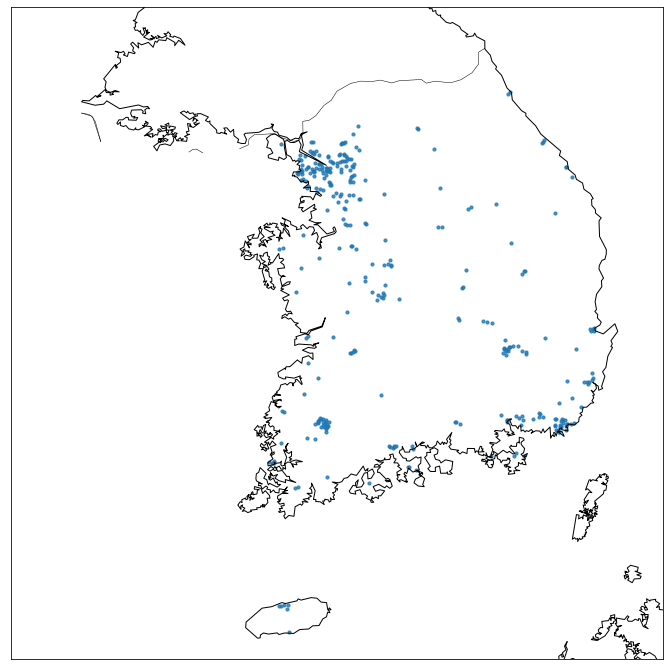

In [19]:
hosType = input("병원 종류를 입력하시오 : ")

plt.figure(figsize=(12, 12))
m = Basemap(llcrnrlon=124, llcrnrlat=33, urcrnrlon=130, urcrnrlat=39, resolution='i')
m.drawcoastlines()
m.drawcountries()
dfTemp = df[df['종별코드명_y']==hosType]
x, y = m(dfTemp['좌표(X)'].values, dfTemp['좌표(Y)'].values)
m.scatter(x, y, s=10, alpha=0.8)
plt.show()